# Storytelling: Entwicklung der Anzahl von Jugendlichen weltweit, Europa, G7 aus deutscher Perspektive

# Bibliotheken & Daten
## Der Datensatz

Wieso diese Daten? Woher?

Ich interessiere mich für junge Menschen / Jugendliche und wie viele es in den unterschiedlichen Ländern in der gesamten Welt gibt. Aus diesem Grund habe ich den Datensatz der WHO zu Jugendlichen im Alter von 10-19 Jahren genommen. Zudem habe ich den Datensatz auf die Jahre 1950-2050 begrenzt -> Daten für 101 Jahre.

https://platform.who.int/data/maternal-newborn-child-adolescent-ageing/indicator-explorer-new/mca/adolescent-population-(thousands)
Stand 08.01.2025: die WHO hat hier schon kleine Übersichten hinzugefügt.

Die Spalten habe ich etwas angepasst. Siehe unten für die alten Spalten, direkt von der WHO-Website:

<img src="fotos/Screenshot alter datensatz.png"></img>


Nun die neuen, angepassten Spalten:

<img src="fotos/Screenshot neuer datensatz.png"></img>

'Value String' (tausend) wurde in 'Adolescent_population_in_millions' (Millionen in xx.x) gerundet. Leerzeichen durch _ ausgetauscht.
Zudem habe ich noch die Spalte change_from_previous_year_in_percent hinzugefügt, um prozentuale Veränderungen vom Vorjahr untersuchen zu können und evtl Trends zu erkennnen.

Folgende Fragen interessieren mich: 
Wie verändert sich die Anzahl der jungen Menschen weltweit, unterteilt nach Region und Einkommensgruppe? Welche Regionen und Einkommensgruppen sind stark gestiegen / werden steigen, und welche sind gesunken / werden sinken? Wie veränderte sich die Zahl in WHO-Region Europa, relativ zu den anderen Regionen? Wie sieht Deutschland im Vergleich zur Welt, zur WHO-Region Europa, und zu den anderen G7-Ländern aus?
Wie sieht die junge Welt von morgen aus? xxxxxx

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Deskriptive Datenanalyse

In [5]:
#load the data
df = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv')
df

Year Country_ISO_3_code      Country             WHO_region  \
0      1950                AFG  Afghanistan  Eastern Mediterranean   
1      1951                AFG  Afghanistan  Eastern Mediterranean   
2      1952                AFG  Afghanistan  Eastern Mediterranean   
3      1953                AFG  Afghanistan  Eastern Mediterranean   
4      1954                AFG  Afghanistan  Eastern Mediterranean   
...     ...                ...          ...                    ...   
23932  2046                ZWE     Zimbabwe                 Africa   
23933  2047                ZWE     Zimbabwe                 Africa   
23934  2048                ZWE     Zimbabwe                 Africa   
23935  2049                ZWE     Zimbabwe                 Africa   
23936  2050                ZWE     Zimbabwe                 Africa   

      World_bank_income_group  Adolescent_population_in_millions  \
0                  Low income                                1.7   
1                  Low income                                1.7   
2                  Low income                                1.7   
3                  Low income                                1.8   
4                  Low income                                1.8   
...                       ...                                ...   
23932     Lower middle income                                5.0   
23933     Lower middle income                                5.1   
23934     Lower middle income                                5.1   
23935     Lower middle income                                5.2   
23936     Lower middle income                                5.2   

      change_from_previous_year_in_percent  
0                                   #WERT!  
1                                      1.5  
2                                      1.5  
3                                      1.6  
4                                      1.7  
...                                    ...  
23932                                  1.3  
23933                                  1.2  
23934                                  1.1  
23935                                  1.0  
23936                                  0.9  

[23937 rows x 7 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23937 entries, 0 to 23936
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  23937 non-null  int64  
 1   Country_ISO_3_code                    23937 non-null  object 
 2   Country                               23937 non-null  object 
 3   WHO_region                            23533 non-null  object 
 4   World_bank_income_group               21816 non-null  object 
 5   Adolescent_population_in_millions     23937 non-null  float64
 6   change_from_previous_year_in_percent  23937 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


In [7]:
from summarytools import dfSummary
dfSummary(df)

### Kategorienbetrachtung
WHO_region & World_bank_income_group
Was sind diese Werte?

In [8]:
unique_who_regions = df['WHO_region'].unique()
unique_income_groups = df['World_bank_income_group'].unique()

count_who_regions = df['WHO_region'].value_counts()
count_income_groups = df['World_bank_income_group'].value_counts()

print(unique_who_regions)
print(unique_income_groups)
print(count_who_regions)
print(count_income_groups)

['Eastern Mediterranean' 'Europe' 'Africa' 'Western Pacific' 'Americas'
 'South-East Asia' nan]
['Low income' 'Upper middle income' 'High income' 'Lower middle income'
 nan]
WHO_region
Europe                   6161
Americas                 5454
Africa                   5151
Western Pacific          3434
Eastern Mediterranean    2222
South-East Asia          1111
Name: count, dtype: int64
World_bank_income_group
High income            8585
Upper middle income    5454
Lower middle income    5151
Low income             2626
Name: count, dtype: int64


## Fehlende Werte suchen & löschen

Von summarytools sehen wir, dass 404 Werte in WHO_region und 2121 Werte von World_bank_income_group fehlen. Welche Länder sind das? (für eine bessere Übersicht selektieren wir für Jahr 2020)

In [9]:
# detect missing values for 2020
df[(df['Year'] == 2020) & 
    ((df['WHO_region'].isna()) | (df['World_bank_income_group'].isna()))]

Year Country_ISO_3_code  \
676    2020                AIA   
2595   2020                BES   
4413   2020                HKG   
4514   2020                MAC   
4918   2020                COK   
7140   2020                FLK   
7645   2020                GUF   
8756   2020                GLP   
9059   2020                GGY   
9564   2020                VAT   
10978  2020                JEY   
11483  2020                XKX   
13402  2020                MTQ   
13705  2020                MYT   
14311  2020                MSR   
15624  2020                NIU   
17543  2020                REU   
17947  2020                BLM   
18048  2020                SHN   
18452  2020                SPM   
20977  2020                TWN   
21482  2020                TKL   
23300  2020                VEN   
23502  2020                WLF   
23603  2020                ESH   

                                                 Country       WHO_region  \
676                                             Anguilla         Americas   
2595                    Bonaire, Sint Eustatius and Saba         Americas   
4413                                China, Hong Kong SAR              NaN   
4514                                    China, Macao SAR              NaN   
4918                                        Cook Islands  Western Pacific   
7140                         Falkland Islands (Malvinas)         Americas   
7645                                       French Guiana         Americas   
8756                                          Guadeloupe         Americas   
9059                                            Guernsey           Europe   
9564                                            Holy See           Europe   
10978                                             Jersey           Europe   
11483  Kosovo (in accordance with UN Security Council...              NaN   
13402                                         Martinique         Americas   
13705                                            Mayotte           Africa   
14311                                         Montserrat         Americas   
15624                                               Niue  Western Pacific   
17543                                            Réunion           Africa   
17947                                   Saint Barthélemy         Americas   
18048                                       Saint Helena           Africa   
18452                          Saint Pierre and Miquelon         Americas   
20977                                      Taiwan, China              NaN   
21482                                            Tokelau  Western Pacific   
23300                 Venezuela (Bolivarian Republic of)         Americas   
23502                                  Wallis and Futuna  Western Pacific   
23603                                     Western Sahara           Africa   

      World_bank_income_group  Adolescent_population_in_millions  \
676                       NaN                                0.0   
2595                      NaN                                0.0   
4413              High income                                0.6   
4514              High income                                0.1   
4918                      NaN                                0.0   
7140                      NaN                                0.0   
7645                      NaN                                0.1   
8756                      NaN                                0.1   
9059                      NaN                                0.0   
9564                      NaN                                0.0   
10978                     NaN                                0.0   
11483     Upper middle income                                0.3   
13402                     NaN                                0.0   
13705                     NaN                                0.1   
14311                     NaN                                0.0   
15624                     NaN  

Hier sehen wir alle Länder mit fehlenden Daten. Meistens sind das kleine Länder / Territorien. 
Was sind die Länder mit > 1 Million jungen Menschen?

In [10]:
df[(df['Year'] == 2020) & 
    ((df['WHO_region'].isna()) | (df['World_bank_income_group'].isna())) & 
    (df['Adolescent_population_in_millions'] > 1)] 

Year Country_ISO_3_code                             Country WHO_region  \
20977  2020                TWN                       Taiwan, China        NaN   
23300  2020                VEN  Venezuela (Bolivarian Republic of)   Americas   

      World_bank_income_group  Adolescent_population_in_millions  \
20977             High income                                2.2   
23300                     NaN                                5.4   

      change_from_previous_year_in_percent  
20977                                 -3.3  
23300                                 -0.5

Die zwei größeren fehlenden Länder sind also Taiwan und Venezuela. Das muss bei den Analysen beachtet werden.
Jetzt säubern wir unser Data Frame von allen Zeilen mit fehlenden Werten.

In [11]:
#clean the data
df = df.dropna(subset=['World_bank_income_group', 'WHO_region'])

# EDA

## Weltweite Entwicklung

### Scatterplot der weltweiten jugendlichen Bevölkerung
Nun betrachten wir die Entwicklung aller Länder welteit. Was sind die Länder mit den meisten jungen Menschen? Wie sieht die Entwicklung weltweit aus? x=Jahr und y=Zahl der jungen Menschen

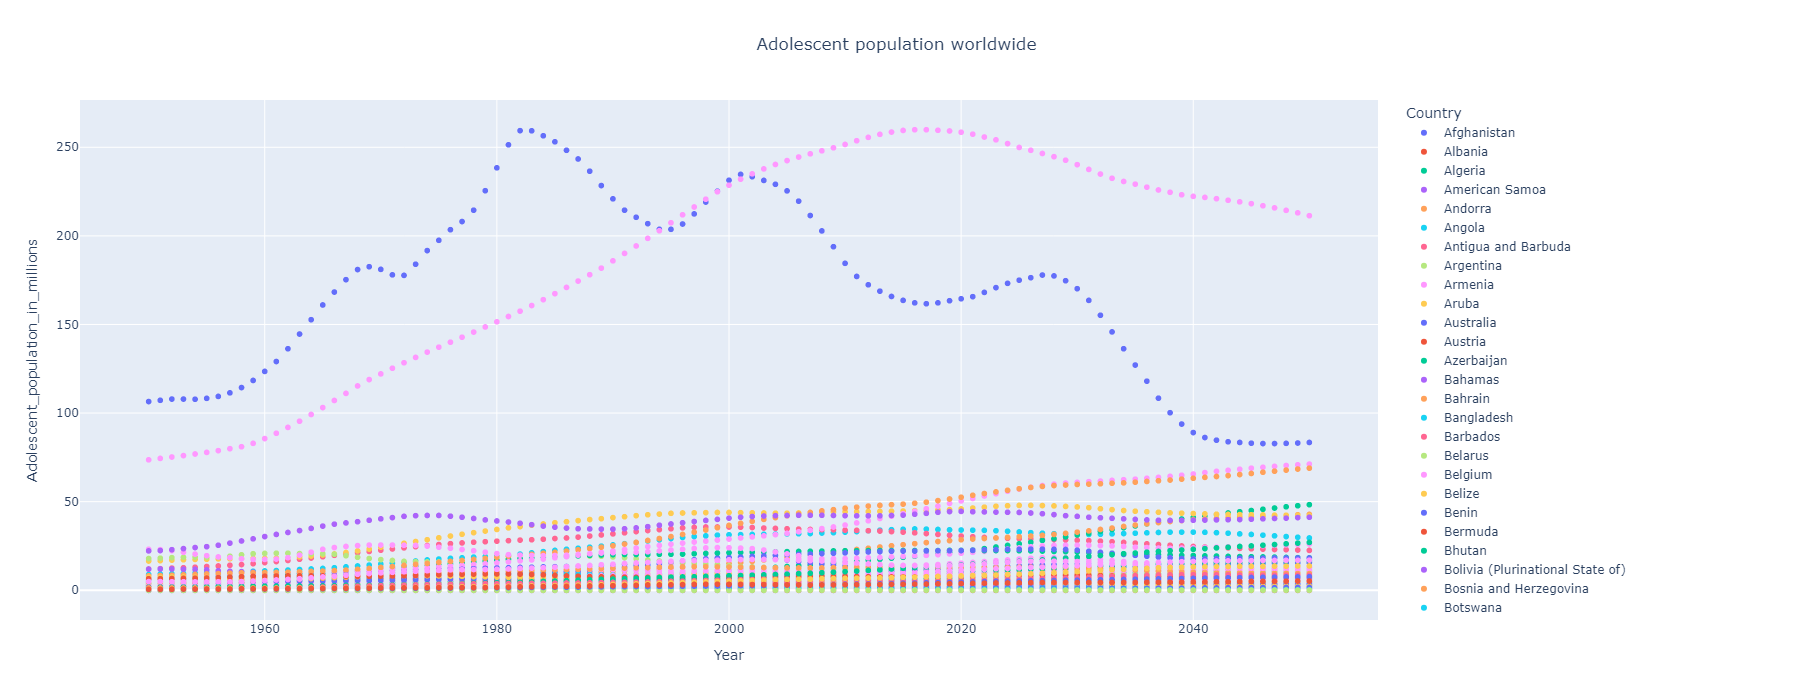

In [12]:
# Visual Python: Visualization > Plotly

#Create scatterplot
fig = px.scatter(df, x='Year', y='Adolescent_population_in_millions', color='Country', 
                 title = "Adolescent population worldwide")

#title to the center
fig.update_layout(title_x=0.5)

#enlarge figure
fig.update_layout(width=1800, height=700)

fig.show()

Das Ergebnis ist natürlich sehr unübersichtlich. Die zwei größten Jugendlichenländer sind klar Indien und China, wobei Chinas Zahl schon seit 1982 runtergeht und Indien seit 2017. Die zwei großen Aufsteiger sind Pakistan und Nigeria.

### *Geographischer Scatterplot (WHO-Regionen) der weltweiten jugendlichen Bevölkerung

Aufgrund der Unübersichtlichkeit des letzten Graphen habe ich ein Bubble Chart mit der Welt als Hintergrund erstellt. Dort werden auch die einzelnen WHO-Regionen farblich unterschieden. Für erhöhte Einfachheit habe ich 5-Jahres-Schritte eingebaut.

In [13]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px
import pandas as pd

#create app
app = Dash(__name__)
#create year-slider with 5-year steps
app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=5,
        value=df['Year'].min(),
        marks={str(year): str(year) for year in range(df['Year'].min(), df['Year'].max()+1, 5)},
        id='year-slider'
    )
])
@callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))

#create Geographic_Scatterplot
def update_figure(selected_year):
    filtered_df = df[df.Year == selected_year]

    fig = px.scatter_geo(filtered_df, locations="Country_ISO_3_code", color="WHO_region",
                     hover_name="Country", size="Adolescent_population_in_millions",
                     projection="natural earth",title="Geographic Scatterplot Adolescent Population worldwide, 5 years steps")

    fig.update_layout(transition_duration=100)

    fig.update_layout(title_x=0.5, width=1200, height=600)

    return fig

if __name__ == '__main__':
    app.run(debug=True, port=8051)

Diese weltweite Übersicht wird den Meisten eine gute Übersicht über die WHO-Regionen geben, und zudem die Größe der Rest der Welt stark verdeutlichen.

### *Sunburst (WHO-Region und Weltbank-Einkommensgruppe) der jugendlichen Bevölkerung weltweit, > 0,5 Mio Jugendliche

Ich wollte auch Kreisdiagramme für die einzelnen WHO-Regionen erstellen, um auch das Verhältnis der Länder untereinander zu vergleichen. Das Sunburst hat sich als perfektes Modell angeboten, und dann kann man auch einen weltweiten Vergleich anstellen. Die sehr kleinen Länder (<0,5 Mio. Jugendliche) wurden entfernt.

In [14]:
#Adolescent Population worldwide (grouped by WHO Region & World Bank Income Group) larger than 0.5 million

import plotly.express as px
import pandas as pd
from dash import Dash, dcc, html, Input, Output, callback

#load the data
df = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv')

# Define fixed colors for WHO_region and World_bank_income_group
unique_who_regions = df['WHO_region'].dropna().unique()
unique_income_groups = df['World_bank_income_group'].dropna().unique()

color_map = {
    **{region: f"rgba({i*50 % 255}, {100 + i*30 % 155}, {200 - i*20 % 100}, 1)" for i, region in enumerate(unique_who_regions)},
    **{group: f"rgba({150 + i*20 % 100}, {50 + i*40 % 155}, {250 - i*60 % 200}, 1)" for i, group in enumerate(unique_income_groups)},
}

# create app
app = Dash(__name__)

# year-slider with title of selected year
app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=None,
        value=df['Year'].min(),
        marks={str(Year): str(Year) for Year in df['Year'].unique()},
        id='year-slider'
    ),
    html.H2(id='year-title', children=f"Selected Year: {df['Year'].min()}")
])

@callback(
    Output('graph-with-slider', 'figure'),
    Output('year-title', 'children'),
    Input('year-slider', 'value'))

# build sunburst
def update_figure(selected_year):
    df_sb_clean = df.dropna(subset=['World_bank_income_group', 'WHO_region'])
    # filter for year and Adolescent_population_in_millions > 0.5
    filtered_df_1 = df_sb_clean[df_sb_clean.Year == selected_year]
    filtered_df = filtered_df_1[filtered_df_1.Adolescent_population_in_millions >= 0.5]

    countries = filtered_df.Country
    WBIC = filtered_df.World_bank_income_group
    adol_population = filtered_df.Adolescent_population_in_millions
    WHO_region = filtered_df.WHO_region

    # build filtered data frame
    filtered_df = pd.DataFrame({
        'Countries': countries,
        'World Bank Income Group': WBIC,
        'Adolescent Population': adol_population,
        'WHO Region': WHO_region
    })
    # order of sunburst
    fig = px.sunburst(filtered_df, path=['WHO Region', 'World Bank Income Group', 'Countries'], values='Adolescent Population', 
                  title="Adolescent Population worldwide (grouped by WHO Region & World Bank Income Group) > 0.5 million",         
                      color='WHO Region',  # Set the color dimension
                      color_discrete_map=color_map  # Apply the fixed color map
                     )
    fig.update_layout(title_x=0.5, width=1200, height=600)

    return fig, f"Selected Year: {selected_year}"

if __name__ == '__main__':
    app.run(debug=True, port=8052)

Hier kann man viele Entwicklungen beobachten. Beim Slider kann man die Pfeiltaste oft nacheinander drücken, und sieht die Entwicklung der gesamten Welt.

Wir wollen uns aber auf die WHO-Region Europa (türkis) fokussieren; die Jahre 1950, 2000, 2050. Hier wird klar - die Anzahl europäischer Jugendlicher insgesamt geht zurück. Besonders das Verhältnis zu den anderen WHO-Regionen ändert sich stark. 1950 ist Europa (105,1 Mio.) die drittgrößte Region, knapp hinter Südostasien (113,7 Mio.). 2000 ist Europa (127,8 Mio.) schon die zweitkleinste Region. Südostasien (337,3 Mio.) ist Platz 1. Aber in 2050 wird Europa (92,1 Mio.) die kleinste Region sein, Südostasien (306,8 Mio.) Nr.2 und Afrika (416,9 Mio.) die größte.

Zudem ändert sich die Zusammenstellung der Länder innerhalb Europas. Die 3 größten Länder in 1950 sind Russland (23,1 Mio), Deutschland (11,9 Mio), Italien (8,2 Mio.). 2000 sind es Russland (24 Mio.), Türkei (13,1 Mio.), Deutschland (9,3 Mio.). 2050 werden es Russland (13,4 Mio.), Türkei (9,4 Mio.) und Usbekistan (8,5 Mio.) sein. Deutschland (6,8 Mio.) liegt dann sogar hinter Frankreich und UK.

## Europäische Entwicklung (& Vergleich mit Afrika)
### Historische Daten: Jugendliche Bevölkerung in der WHO-Region Europa 1950-2020, > 5 Mio Jugendliche
Ich will einen detaillierteren Blick auf die historischen Daten der größeren Länder Europas (>5Mio. Jugendliche) werfen.

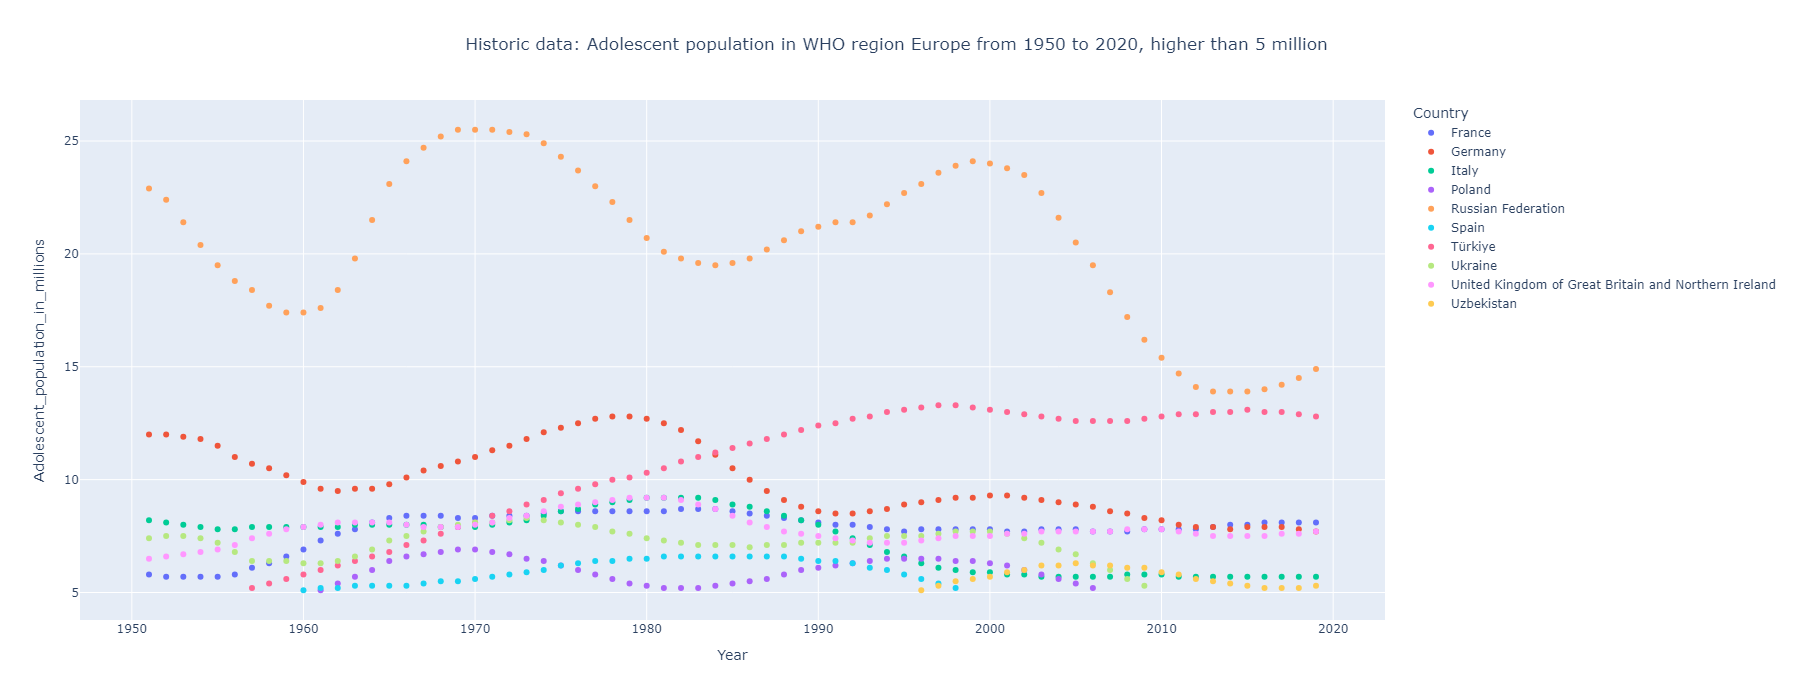

In [15]:
#Historic data: Adolescent population in WHO region Europe from 1950 to 2020, higher than 5 million
# Visual Python: Visualization > Plotly
fig = px.scatter(df, x='Year', y='Adolescent_population_in_millions', color='Country')

# Filter the DataFrame for High income
df_filtered = df[(df['WHO_region'] == 'Europe') 
    & (df['Adolescent_population_in_millions'] > 5)
    & (df.Year > 1950) & (df.Year < 2020)]

# Create the scatter plot with the filtered DataFrame
fig = px.scatter(df_filtered, x='Year', y='Adolescent_population_in_millions', color='Country', 
                 title="Historic data: Adolescent population in WHO region Europe from 1950 to 2020, higher than 5 million")

fig.update_layout(title_x=0.5)

fig.update_layout(width=1700, height=700)

fig.show()

Die Ergebnisse sind sehr interessant. Besonders Deutschland (dunkelrot) geht hier stark nach unten. Schon 1984 hatte die Türkei mehr Jugendliche als wir.

### Jugendliche Bevölkerung in der WHO-Region Europa 1950-2050, > 5 Mio Jugendliche

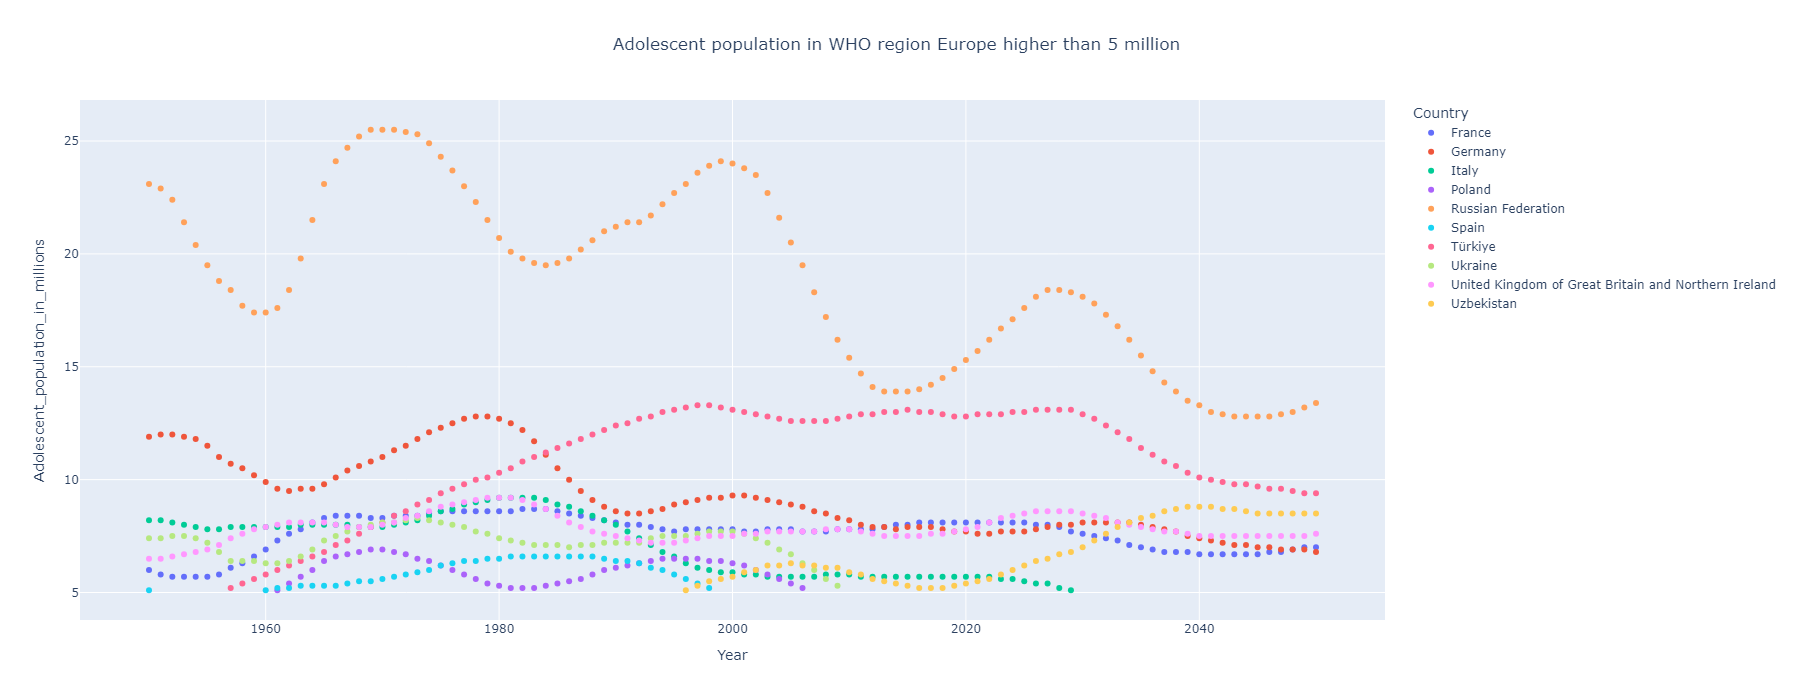

In [16]:
#Adolescent population in WHO region Europe higher than 5 million
# Visual Python: Visualization > Plotly
fig = px.scatter(df, x='Year', y='Adolescent_population_in_millions', color='Country')

# Filter the DataFrame for High income
df_filtered = df[(df['WHO_region'] == 'Europe') 
    & (df['Adolescent_population_in_millions'] > 5)]

# Create the scatter plot with the filtered DataFrame
fig = px.scatter(df_filtered, x='Year', y='Adolescent_population_in_millions', color='Country', 
                 title="Adolescent population in WHO region Europe higher than 5 million")

fig.update_layout(title_x=0.5)

fig.update_layout(width=1700, height=700)

fig.show()

### Prozentuelle Veränderung zum Vorjahr für die größten europäischen Länder

Diese Auswahl beschränkt sich auf die 5 größten Länder in 1950, 2000, 2050.

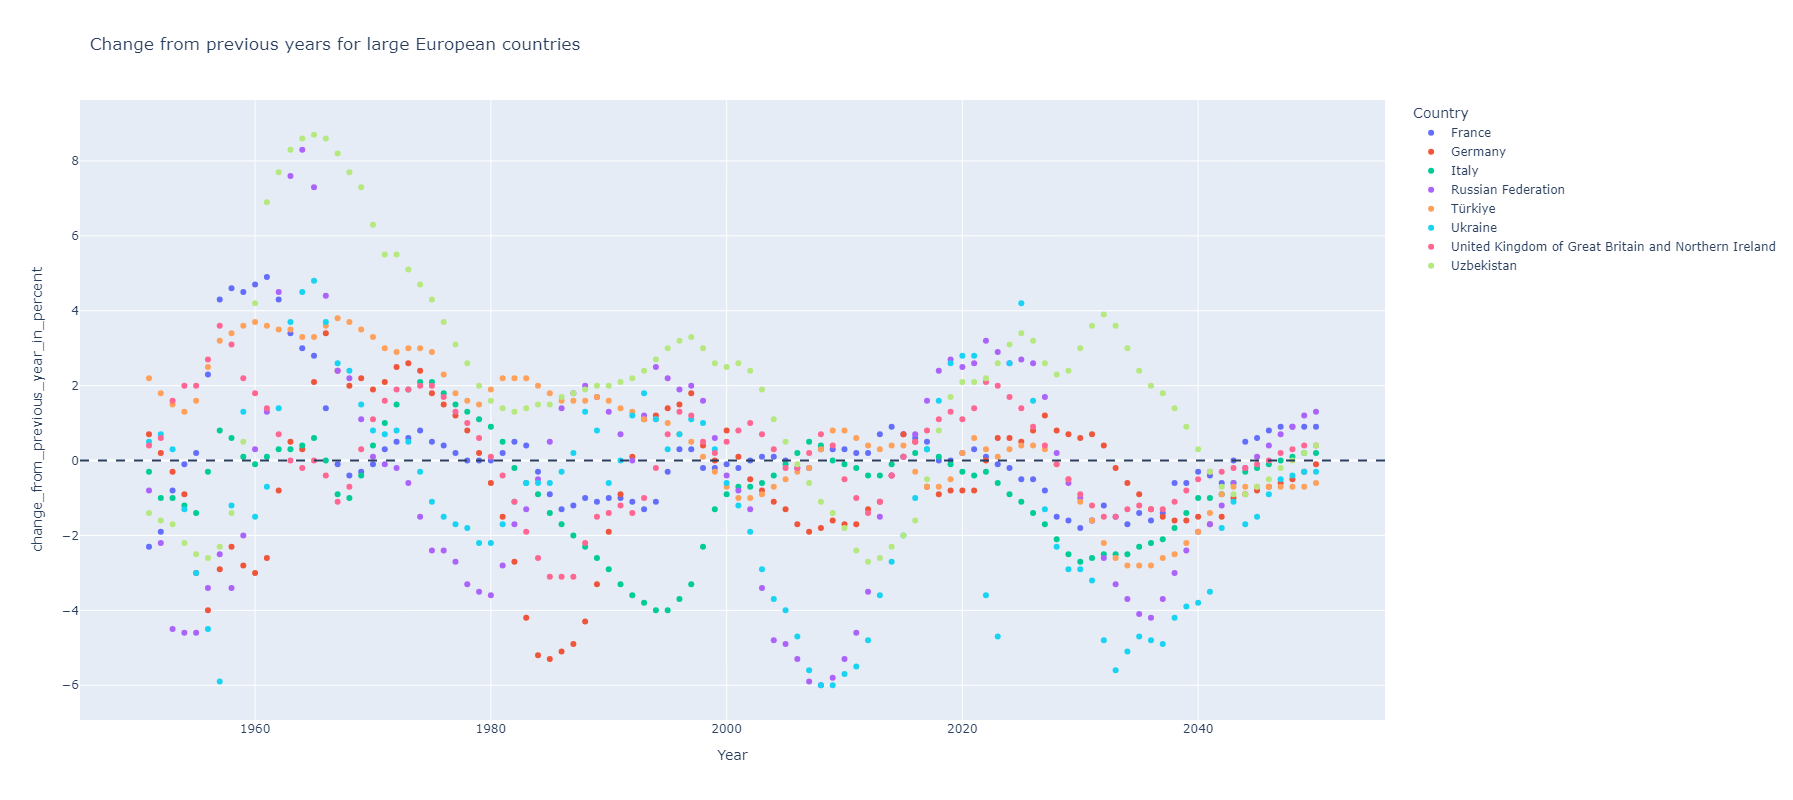

In [17]:
#Change from previous years for large European countries
# Visual Python: Visualization > Plotly

import pandas as pd
import plotly.express as px

large_European_countries = ['Russian Federation','Germany','Italy','Ukraine','United Kingdom of Great Britain and Northern Ireland',
                'Türkiye','France','Uzbekistan']

df_filtered_change = df[(df["Country"].isin(large_European_countries)) & (df["Year"] >= 1951) & (df["Year"] <= 2050)].copy()
df_filtered_change['change_from_previous_year_in_percent'] = pd.to_numeric(df_filtered_change
                                                                    ['change_from_previous_year_in_percent'], 
                                                                    errors='coerce')

fig = px.scatter(df_filtered_change, x='Year', y='change_from_previous_year_in_percent', color='Country', 
                 title="Change from previous years for large European countries")
fig.add_hline(y=0, line_dash="dash")

fig.update_layout(width=1200, height=800)

fig.show()

### Vergleich: Entwicklung in der WHO-Region Afrika, >5 Mio. Jugendliche

Das ist Europa. Ich will das zum Schluss noch mit Afrika vergleichen, die eine sehr andere Entwicklung durchgemacht hat.

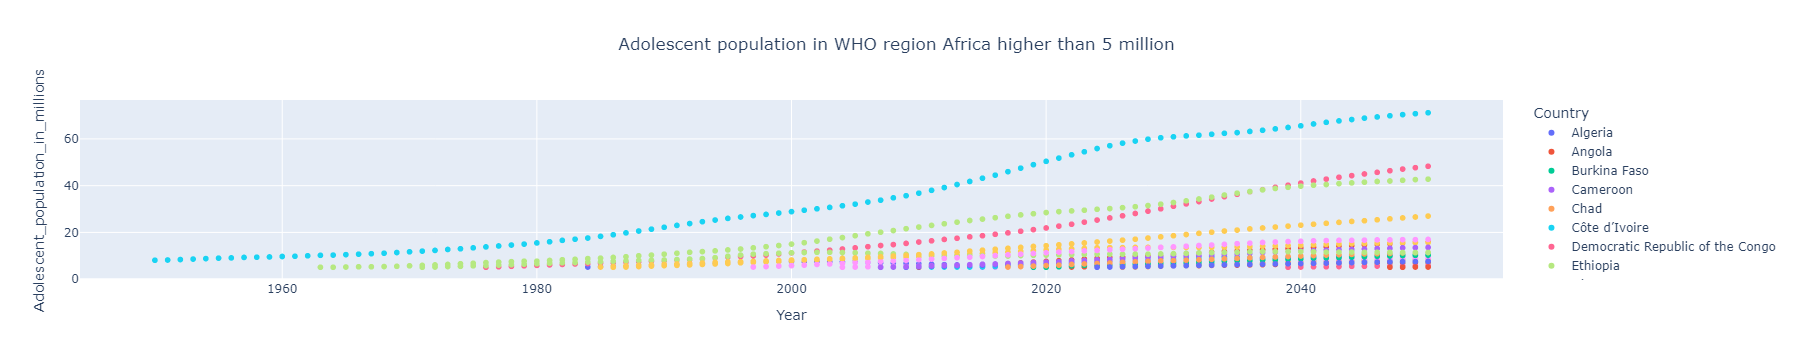

In [18]:
#Adolescent population in WHO region Africa higher than 5 million
# Visual Python: Visualization > Plotly
fig = px.scatter(df, x='Year', y='Adolescent_population_in_millions', color='Country')

# Filter the DataFrame for > 2 Million adolescents and WHO region == Europe
df_filtered = df[(df['Adolescent_population_in_millions'] > 5) & (df['WHO_region'] == 'Africa')]

# Create the scatter plot with the filtered DataFrame
fig = px.scatter(df_filtered, x='Year', y='Adolescent_population_in_millions', color='Country', 
                 title="Adolescent population in WHO region Africa higher than 5 million")

fig.update_layout(title_x=0.5)

fig.show()

Interessante Bemerkungen: Nigeria wird 2050 71,2 Mio. Jugendliche haben, während die gesamte WHO-Region Europa (auch mit Ländern wie Tadschikistan und Usbekistan) insgesamt nur 92,1 Mio. Jugendliche haben wird.

Der rasante Anstieg von Afrikas Jugendlichen wird auch bei den Veränderungen zum Vorjahr gezeigt.

### Vergleich: Veränderung zum Vorjahr für die größten afrikanischen Länder

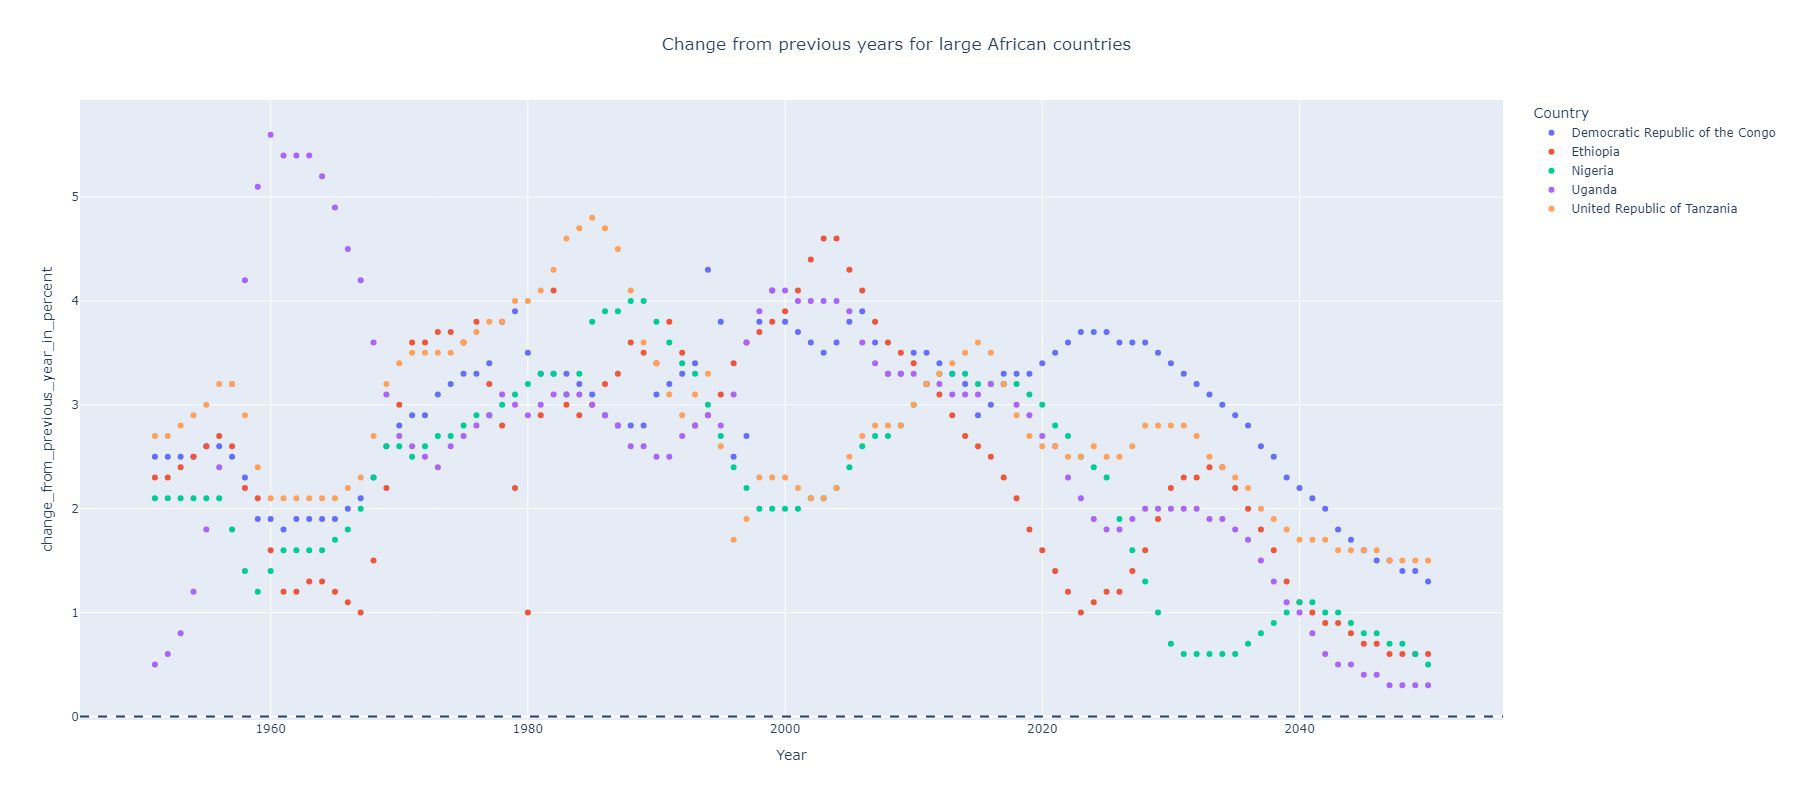

In [19]:
#Change from previous years for large African countries
# Visual Python: Visualization > Plotly

import pandas as pd
import plotly.express as px

large_African_countries = ['Nigeria','Democratic Republic of the Congo','Ethiopia','United Republic of Tanzania',
                           'Uganda',]

df_filtered_change = df[(df["Country"].isin(large_African_countries)) & (df["Year"] >= 1951) & (df["Year"] <= 2050)].copy()
df_filtered_change['change_from_previous_year_in_percent'] = pd.to_numeric(df_filtered_change
                                                                    ['change_from_previous_year_in_percent'], 
                                                                    errors='coerce')

fig = px.scatter(df_filtered_change, x='Year', y='change_from_previous_year_in_percent', color='Country', 
                 title="Change from previous years for large African countries")
fig.add_hline(y=0, line_dash="dash")

fig.update_layout(width=1200, height=800)

fig.update_layout(title_x=0.5)

fig.show()

## Entwicklung innerhalb der G7

Einige mögen vielleicht jetzt meinen, dass die hohe Anzahl von Jugendlichen typisch für unterentwickelte Länder ist. Aus diesem Grund möchte ich noch die G7-Länder untereinander vergleichen (von denen Deutschland auch ein Teil ist).

https://de.wikipedia.org/wiki/G7

In [20]:
G7_countries = ['Canada','France','Germany','Italy','Japan',
                'United Kingdom of Great Britain and Northern Ireland','United States of America']

### Jugendliche Bevölkerung in G7-Ländern

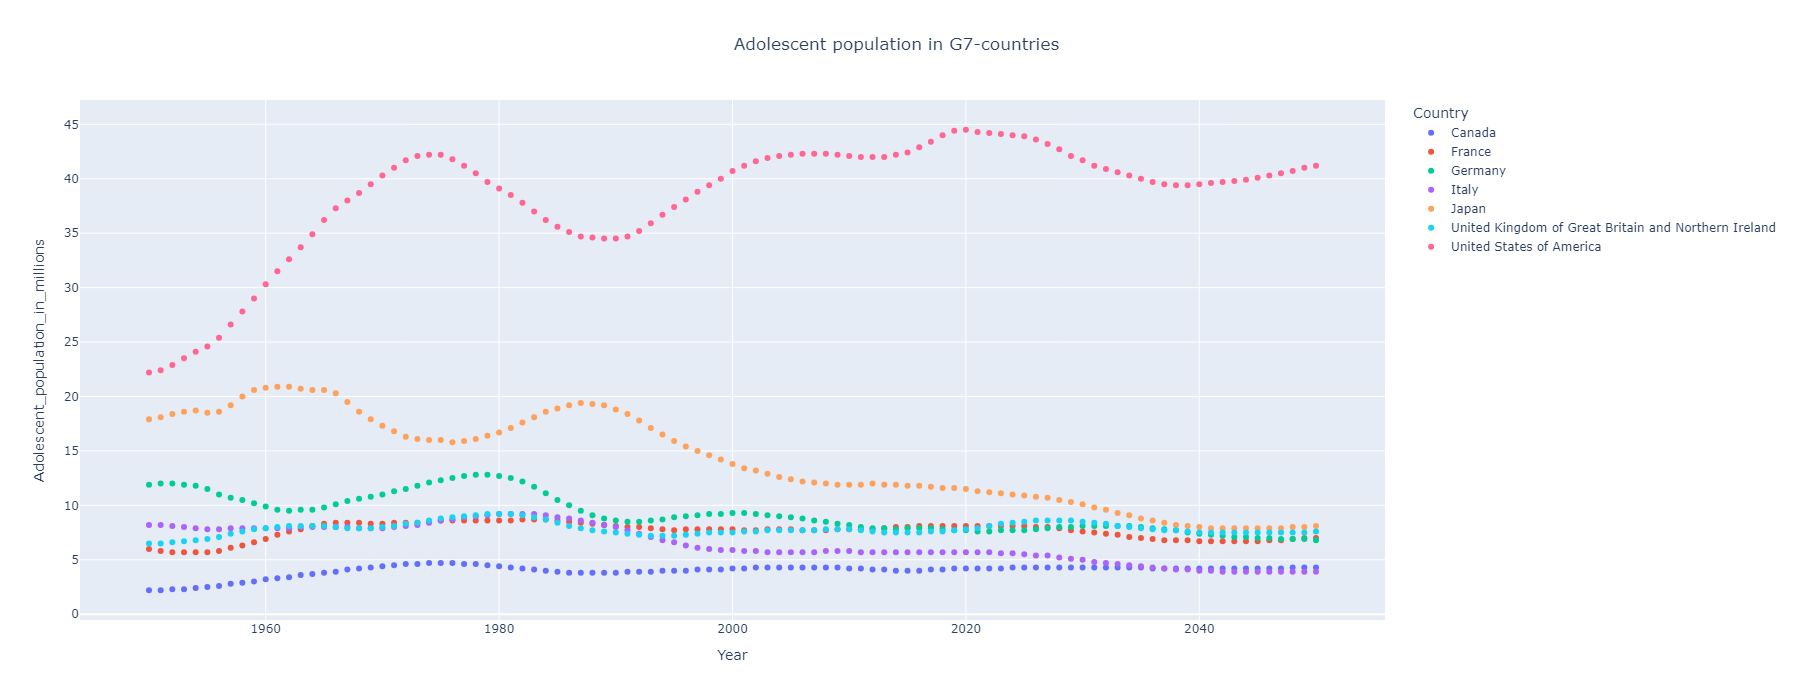

In [21]:
#Adolescent population in G7-countries
# Visual Python: Visualization > Plotly
fig = px.scatter(df, x='Year', y='Adolescent_population_in_millions', color='Country')

# Filter the DataFrame for High income
df_filtered = df[df['Country'].isin(G7_countries)]

# Create the scatter plot with the filtered DataFrame
fig = px.scatter(df_filtered, x='Year', y='Adolescent_population_in_millions', color='Country', 
                 title="Adolescent population in G7-countries")

fig.update_layout(title_x=0.5)

fig.update_layout(width=1700, height=700)

fig.show()

Interessante Beobachtung: Nur die Verlierermächte des 2. WK 

### Prozentuelle Veränderung zum Vorjahr für die G7-Länder

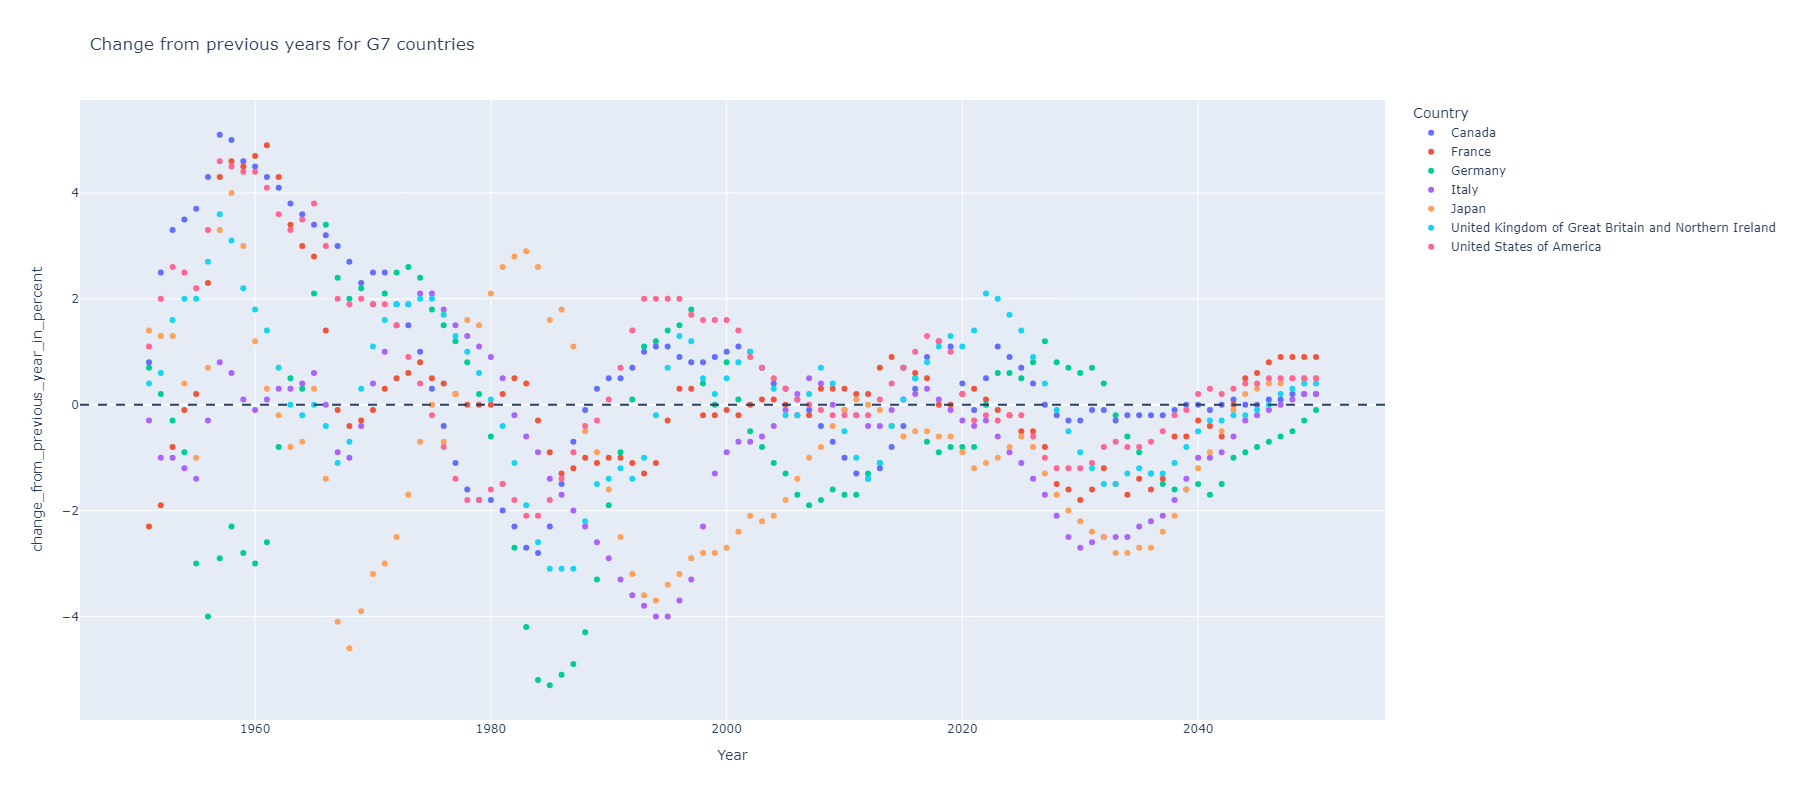

In [22]:
#Change from previous years for G7 countries
# Visual Python: Visualization > Plotly

import pandas as pd
import plotly.express as px

df_filtered_change = df[(df["Country"].isin(G7_countries)) & (df["Year"] >= 1951) & (df["Year"] <= 2050)].copy()
df_filtered_change['change_from_previous_year_in_percent'] = pd.to_numeric(df_filtered_change
                                                                    ['change_from_previous_year_in_percent'], 
                                                                    errors='coerce')

fig = px.scatter(df_filtered_change, x='Year', y='change_from_previous_year_in_percent', color='Country', 
                 title="Change from previous years for G7 countries")
fig.add_hline(y=0, line_dash="dash")

fig.update_layout(width=1500, height=800)

fig.show()

### *Tortendiagramm der G7-Länder 1950-2050

In [23]:
# Adolescent Population worldwide (grouped by WHO Region & World Bank Income Group) larger than 0.5 million

import plotly.express as px
import pandas as pd
from dash import Dash, dcc, html, Input, Output, callback

# Filter data for G7 countries
G7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 
                'United Kingdom of Great Britain and Northern Ireland', 'United States of America']
df = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv')
df_filtered = df[df['Country'].isin(G7_countries)]

# Custom color map for G7 countries
country_colors = {
    'Canada': 'darkred',  # Dark Burgundy
    'France': 'darkblue',  # Dark Blue
    'Germany': 'darkgrey',  # Dark Grey
    'Italy': 'darkgreen',  # Dark Green
    'Japan': 'lightpink',  # Light Pink
    'United Kingdom of Great Britain and Northern Ireland': 'lightcoral',  # Light Red
    'United States of America': 'lightblue'  # Light Blue
}

# Create Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df_filtered['Year'].min(),
        df_filtered['Year'].max(),
        step=None,
        value=df_filtered['Year'].min(),
        marks={str(Year): str(Year) for Year in df_filtered['Year'].unique()},
        id='year-slider'
    ),
    html.H2(id='year-title', children=f"Selected Year: {df_filtered['Year'].min()}")
])

# Callback to update the graph and title
@callback(
    Output('graph-with-slider', 'figure'),
    Output('year-title', 'children'),
    Input('year-slider', 'value'))
def update_plot(selected_year):
    # Filter data for the selected year
    df_year = df_filtered[df_filtered['Year'] == selected_year]
    
    # Create the pie chart using Plotly with fixed colors
    fig = px.pie(
        df_year,
        names='Country',
        values='Adolescent_population_in_millions',
        title="Proportion of Adolescent Population in G7 Countries",
        color='Country',  # Specify the column for colors
        color_discrete_map=country_colors  # Use the custom color map
    )
    
    # Update layout for better visualization
    fig.update_layout(title_x=0.5, height=500, width=900)
    
    return fig, f"Selected Year: {selected_year}"

# Run the app
if __name__ == '__main__':
    app.run(debug=True, port=8053)

# INTERACTIVE DASHBOARD

*** in order for the dashboard to work, the 3 apps must already run on the local host. Just let the entire notebook run ***

In [24]:
import dash
import dash_bootstrap_components as dbc
from dash import Input, Output, dcc, html

app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

# Sidebar styles
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "16rem",
    "padding": "2rem 1rem",
    "background-color": "#f8f9fa",
}

# Content area styles
CONTENT_STYLE = {
    "margin-left": "18rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
}

sidebar = html.Div(
    [
        html.H2("Sidebar", className="display-4"),
        html.Hr(),
        html.P("Adolescents worldwide 1950-2050", className="lead"),
        dbc.Nav(
            [
                dbc.NavLink("Geoplot worldwide: WHO Regions", href="/app1", active="exact"),
                dbc.NavLink("Sunburst: WHO Regions & World Bank Income Group", href="/app2", active="exact"),
                dbc.NavLink("Proportion of Adolescents in G7 countries", href="/app3", active="exact"),
            ],
            vertical=True,
            pills=True,
        ),
    ],
    style=SIDEBAR_STYLE,
)

content = html.Div(id="page-content", style=CONTENT_STYLE)

app.layout = html.Div([dcc.Location(id="url"), sidebar, content])

@app.callback(Output("page-content", "children"), [Input("url", "pathname")])
def render_page_content(pathname):

    if pathname == "/":
        pathname = "/app1"  # Redirect to App 1 by default
    
    if pathname == "/app1":
        return html.Iframe(src="http://localhost:8051", width="100%", height="1000")
    elif pathname == "/app2":
        return html.Iframe(src="http://localhost:8052", width="100%", height="1000")
    elif pathname == "/app3":
        return html.Iframe(src="http://localhost:8053", width="100%", height="1000")
    # If the user tries to reach a different page, return a 404 message
    return html.Div(
        [
            html.H1("404: Not found", className="text-danger"),
            html.Hr(),
            html.P(f"The pathname {pathname} was not recognised..."),
        ],
        className="p-3 bg-light rounded-3",
    )

if __name__ == "__main__":
    app.run_server(debug=False, port=8000)  # Run the main dashboard app on a different port